In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats as stats


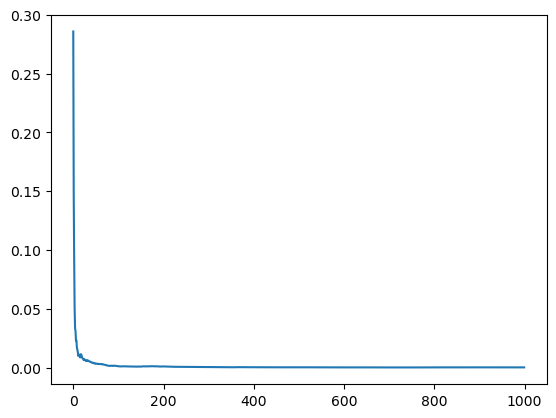

In [120]:
MAX_ITER = 1000
a = 1
eta = 2
l = 0.4
t = 0.02
t_star = 0.9
t_u = 5
t_l = -1
tau = lambda x: np.min([np.max([x, t_l]), t_u])
values = []

def loss(x, eta=2):
    return (1/eta)*np.max([x, 0])**eta

for i in range(1, MAX_ITER+1):

    zi = -np.random.normal(0,0.1)
    t = t + (a/i)*(loss(zi - t) - l)
    values.append(-t)

values = np.array(values)
#plt.plot((values-t_star)**2)
plt.plot((values-t_star)**2)
plt.show()

In [121]:
df = pd.DataFrame((values-t_star)**2, columns=['(SR - SR*)^2'])

# df.to_csv('SR_Estimation_1.csv', index=True)

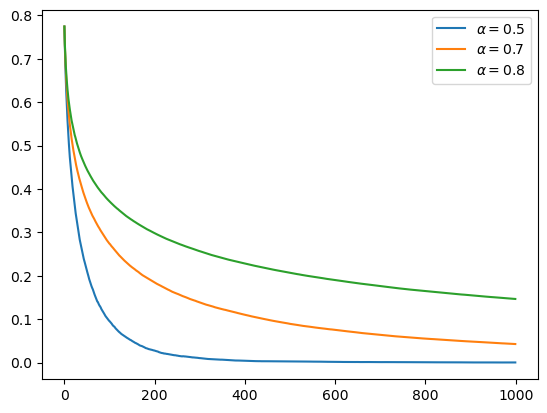

In [122]:
values = []
a = 0.1

df = pd.DataFrame()

np.random.seed(42)
plt.figure()
for alpha in [0.5, 0.7, 0.8]:
    values = []
    t = 0.02
    for i in range(1, MAX_ITER+1):

        zi = -np.random.normal(0,0.1)
        t = t + (a/i**alpha)*(loss(zi - t) - l)
        values.append(-t)

    
    values = np.array(values)
    df[alpha] = (values-t_star)**2
    plt.plot((values-t_star)**2, label = r'$\alpha = {}$'.format(alpha))

plt.legend()
plt.show()

In [123]:
# df.to_csv('SR_Estimation_2.csv', index=True)